In [96]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

## 데이터셋을 라이브러리에서 가져올 예정. 파일에서도 가져옴

In [4]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from matplotlib import pyplot as plt

In [5]:
import numpy as np
data = np.loadtxt('data/mnist_train_small.csv', delimiter=',', skiprows=1)
data.shape


(100, 785)

5.0


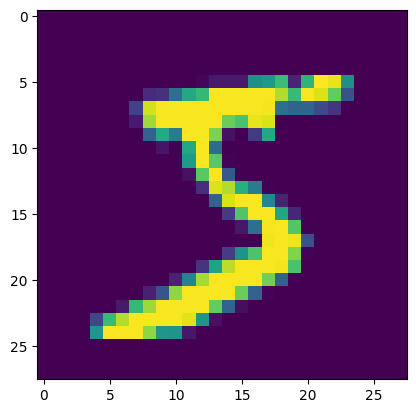

In [4]:
import matplotlib.pyplot as plt
print(data[0,0])
img = data[0, 1:].reshape(28,28)
plt.imshow(img)

In [9]:
print(data[1,0])

0.0


In [13]:
for row in data[1, 1:].reshape(28,28):
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51159253159 50  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252252237  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 54227253252239233252 57  6  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 10 60224252253252202 84252253122  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0163252252252253252252 96189253167  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 51238253253190114253228 47 79255168  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 48238252252179 12 75121 21  0  0253243 50  0  0  0  0  0
  0  0  0  0  0  0  0  0 38165253233208 84  0  0  0  0  0  025325

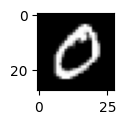

In [14]:
plt.figure(figsize=(1,1))
plt.imshow(data[1, 1:].reshape(28,28), cmap='gray')

In [17]:
!pip install opencv-contrib-python

In [18]:
!pip install opencv-python

In [26]:
# 칼라사진 -> 흑백모드의 넘파이 배열로
import cv2
image_gray = cv2.imread(r'C:\Ai_x\source\05_deeplearning\data\sample.jpg', cv2.IMREAD_GRAYSCALE)
print(image_gray.shape)
print(type(image_gray))

(275, 183)
<class 'numpy.ndarray'>


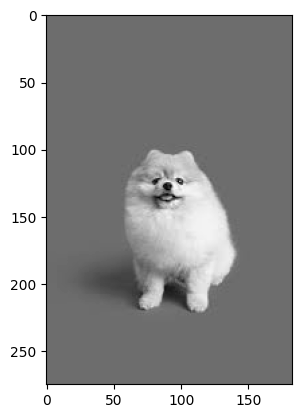

In [41]:

plt.imshow(image_gray, cmap='gray')

In [28]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [33]:
print(y_train[0])
for row in X_train[0]:
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

5
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0

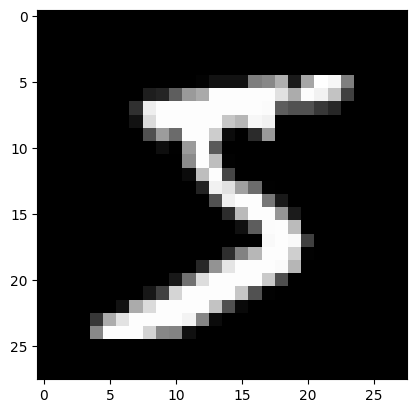

In [29]:
plt.imshow(X_train[0], cmap='gray')

In [34]:
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

In [35]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


In [40]:
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
train_X.shape, val_X.shape, test_X.shape

((50000, 784), (10000, 784), (10000, 784))

In [43]:
# 훈련셋5만개 -> 700개, 테스트셋1만개 -> 300개 추출(목적 : 학습시간 절약)
train_idx = np.random.choice(50000, 700)
val_idx  = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X   = val_X[val_idx]
y_val   = y_val[val_idx]
test_X = X_test
train_X.shape, y_train.shape, val_X.shape, y_val.shape

((700, 784), (700,), (300, 784), (300,))

In [47]:
# 타겟변수의 원핫인코딩
train_Y = to_categorical(y_train,10)
val_Y = to_categorical(y_val)
test_Y = to_categorical(y_test)
print(y_train[:2])
print(train_Y[:2])

[6 1]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [48]:
# 데이터 처리 전 작업
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X   = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
train_idx = np.random.choice(50000, 700)
val_idx  = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X   = val_X[val_idx]
y_val   = y_val[val_idx]
# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape

((700, 784), (700, 10), (300, 784), (300, 10), (10000, 784), (10000, 10))

## 모델 구성

In [52]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 1570      
                                                                 
 dense_3 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])

## 4 모델 학습

In [61]:
%%time
hist = model.fit(train_X, train_Y,
                epochs=500,
                batch_size=100,
                validation_data=(val_X, val_Y))

Epoch 1/500
7/7 [==============================] - 0s 12ms/step - loss: 0.7933 - accuracy: 0.7057 - val_loss: 1.6910 - val_accuracy: 0.4833
Epoch 2/500
7/7 [==============================] - 0s 7ms/step - loss: 0.7927 - accuracy: 0.7071 - val_loss: 1.7007 - val_accuracy: 0.4833
Epoch 3/500
7/7 [==============================] - 0s 7ms/step - loss: 0.7919 - accuracy: 0.7071 - val_loss: 1.6961 - val_accuracy: 0.4867
Epoch 4/500
7/7 [==============================] - 0s 7ms/step - loss: 0.7917 - accuracy: 0.7057 - val_loss: 1.6976 - val_accuracy: 0.4867
Epoch 5/500
7/7 [==============================] - 0s 7ms/step - loss: 0.7911 - accuracy: 0.7057 - val_loss: 1.7007 - val_accuracy: 0.4833
Epoch 6/500
7/7 [==============================] - 0s 6ms/step - loss: 0.7904 - accuracy: 0.7071 - val_loss: 1.6978 - val_accuracy: 0.4933
Epoch 7/500
7/7 [==============================] - 0s 7ms/step - loss: 0.7897 - accuracy: 0.7071 - val_loss: 1.6985 - val_accuracy: 0.4900
Epoch 8/500
7/7 [=========

7/7 [==============================] - 0s 7ms/step - loss: 0.7364 - accuracy: 0.7229 - val_loss: 1.8520 - val_accuracy: 0.4933
Epoch 118/500
7/7 [==============================] - 0s 7ms/step - loss: 0.7363 - accuracy: 0.7214 - val_loss: 1.8517 - val_accuracy: 0.4900
Epoch 119/500
7/7 [==============================] - 0s 7ms/step - loss: 0.7357 - accuracy: 0.7229 - val_loss: 1.8474 - val_accuracy: 0.4933
Epoch 120/500
7/7 [==============================] - 0s 8ms/step - loss: 0.7349 - accuracy: 0.7214 - val_loss: 1.8520 - val_accuracy: 0.4900
Epoch 121/500
7/7 [==============================] - 0s 7ms/step - loss: 0.7348 - accuracy: 0.7214 - val_loss: 1.8538 - val_accuracy: 0.4933
Epoch 122/500
7/7 [==============================] - 0s 7ms/step - loss: 0.7342 - accuracy: 0.7214 - val_loss: 1.8507 - val_accuracy: 0.4900
Epoch 123/500
7/7 [==============================] - 0s 7ms/step - loss: 0.7339 - accuracy: 0.7214 - val_loss: 1.8615 - val_accuracy: 0.4867
Epoch 124/500
7/7 [========

7/7 [==============================] - 0s 8ms/step - loss: 0.6926 - accuracy: 0.7414 - val_loss: 2.0248 - val_accuracy: 0.4933
Epoch 234/500
7/7 [==============================] - 0s 6ms/step - loss: 0.6920 - accuracy: 0.7400 - val_loss: 2.0255 - val_accuracy: 0.4933
Epoch 235/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6917 - accuracy: 0.7414 - val_loss: 2.0300 - val_accuracy: 0.4933
Epoch 236/500
7/7 [==============================] - 0s 8ms/step - loss: 0.6914 - accuracy: 0.7429 - val_loss: 2.0286 - val_accuracy: 0.4933
Epoch 237/500
7/7 [==============================] - 0s 8ms/step - loss: 0.6910 - accuracy: 0.7443 - val_loss: 2.0289 - val_accuracy: 0.4933
Epoch 238/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6906 - accuracy: 0.7414 - val_loss: 2.0334 - val_accuracy: 0.4933
Epoch 239/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6904 - accuracy: 0.7414 - val_loss: 2.0317 - val_accuracy: 0.4933
Epoch 240/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.6578 - accuracy: 0.7543 - val_loss: 2.2132 - val_accuracy: 0.4967
Epoch 350/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6575 - accuracy: 0.7557 - val_loss: 2.2106 - val_accuracy: 0.4967
Epoch 351/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6567 - accuracy: 0.7557 - val_loss: 2.2302 - val_accuracy: 0.4900
Epoch 352/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6564 - accuracy: 0.7557 - val_loss: 2.2280 - val_accuracy: 0.4967
Epoch 353/500
7/7 [==============================] - 0s 8ms/step - loss: 0.6564 - accuracy: 0.7586 - val_loss: 2.2194 - val_accuracy: 0.4900
Epoch 354/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6556 - accuracy: 0.7586 - val_loss: 2.2474 - val_accuracy: 0.4967
Epoch 355/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6552 - accuracy: 0.7557 - val_loss: 2.2308 - val_accuracy: 0.4933
Epoch 356/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.6274 - accuracy: 0.7657 - val_loss: 2.3988 - val_accuracy: 0.5000
Epoch 466/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6285 - accuracy: 0.7729 - val_loss: 2.4313 - val_accuracy: 0.4867
Epoch 467/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6280 - accuracy: 0.7643 - val_loss: 2.4331 - val_accuracy: 0.4867
Epoch 468/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6270 - accuracy: 0.7743 - val_loss: 2.4177 - val_accuracy: 0.4967
Epoch 469/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6269 - accuracy: 0.7686 - val_loss: 2.4411 - val_accuracy: 0.4933
Epoch 470/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6263 - accuracy: 0.7657 - val_loss: 2.4323 - val_accuracy: 0.4933
Epoch 471/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6260 - accuracy: 0.7686 - val_loss: 2.4375 - val_accuracy: 0.4933
Epoch 472/500
7/7 [========

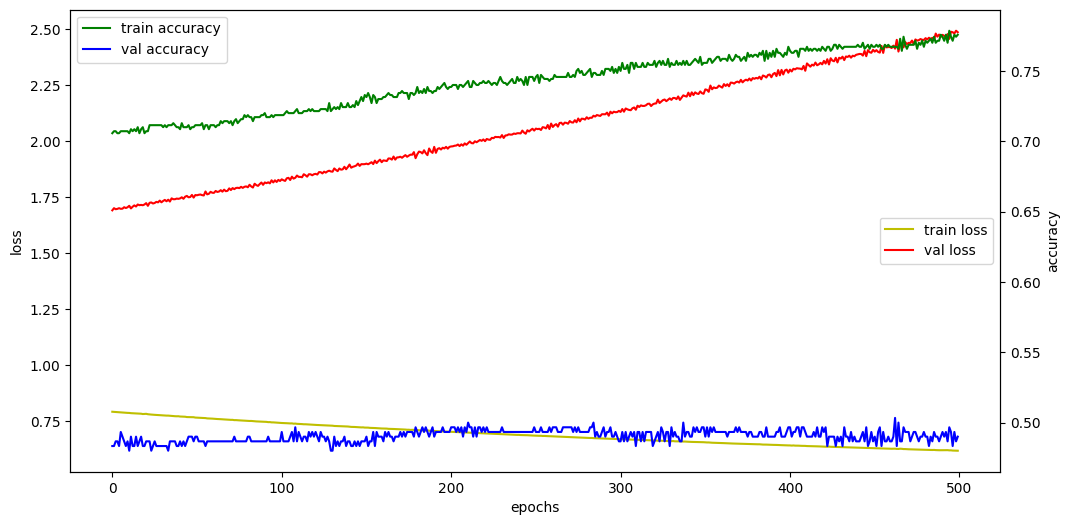

In [64]:
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

In [63]:
# 모델 평가
loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100)
print(loss_and_metrics[0])
print(loss_and_metrics[1])

100/100 [==============================] - 0s 2ms/step - loss: 2.4036 - accuracy: 0.4997
2.403587818145752
0.49970000982284546


## 정확도 올리기
- 레이어 추가하기
- 데이터 확보
- 과적합 방지(validation data 추가, dropout, 활성화함수relu, tanh, elu,...)
- epoch 조정
- optimizer 변경

epoch: 10, loss: 2.1355, acc: 0.1800, val_loss: 2.1286, val_acc: 0.1800
epoch: 20, loss: 2.0366, acc: 0.2271, val_loss: 2.0281, val_acc: 0.2467
epoch: 30, loss: 1.9650, acc: 0.2429, val_loss: 1.9636, val_acc: 0.2600


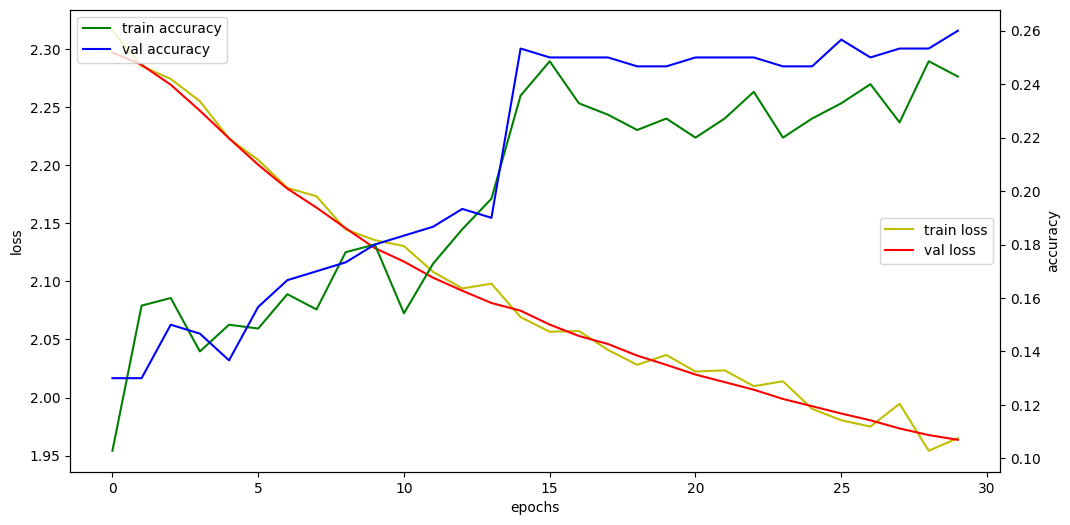

loss : 1.9457573890686035
accuracy : 0.3018999993801117
CPU times: total: 2.84 s
Wall time: 2.32 s


In [90]:
%%time
# 매번 로그 출력하면 지저분해 질 수 있으니, 특정 에포크마다 로그 출력하도록 제한
from tensorflow.keras.callbacks import Callback 

class CustomHistory(Callback):
    def __init__(self):  
        super().__init__()  # 부모 클래스 초기화
        self.epoch = 0

    def on_epoch_end(self, epoch, logs=None):  # ✅ 함수 헤더와 인자 수정
        self.epoch += 1
        if self.epoch % 10 == 0:
            print('epoch: {}, loss: {:.4f}, acc: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}'.format(
                self.epoch,
                logs.get('loss'),
                logs.get('accuracy'),
                logs.get('val_loss'),
                logs.get('val_accuracy')
            ))

        
customHistory = CustomHistory()
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X   = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0

train_idx = np.random.choice(50000, 700)
val_idx  = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X   = val_X[val_idx]
y_val   = y_val[val_idx]

# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)

train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape
# 모델생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])
# 학습
hist = model.fit(train_X, train_Y,
                epochs=30,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=0,
                callbacks=[customHistory]) # 콜백함수
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=0)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

In [72]:
# 모델 평가
loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100)
print(loss_and_metrics[0])
print(loss_and_metrics[1])

100/100 [==============================] - 0s 5ms/step - loss: 0.1072 - accuracy: 0.9825
0.1071540042757988
0.9825000166893005


In [84]:
test_Y.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [74]:
# 실제값
test_Y.argmax(axis=1) == y_test

array([ True,  True,  True, ...,  True,  True,  True])

In [78]:
# 예측값
yhat = model.predict(test_X).argmax(axis=1)
yhat = np.argmax(model.predict(test_X), axis=1)
yhat

313/313 [==============================] - 1s 4ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [79]:
pd.crosstab(y_test, yhat)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,972,1,1,0,1,0,2,0,2,1
1,0,1129,1,2,0,0,2,0,1,0
2,2,0,1008,11,1,0,0,5,5,0
3,0,0,0,998,0,3,0,3,1,5
4,0,3,2,1,950,0,4,1,0,21
5,2,0,0,11,1,872,1,0,2,3
6,3,2,0,1,4,4,943,0,1,0
7,0,6,5,2,0,0,0,1008,3,4
8,0,0,2,8,0,1,1,3,953,6


In [80]:
# 틀린갯수:
10000-10000*loss_and_metrics[1]

174.99983310699463

In [81]:
cnt = 0
for y, h in zip(y_test, yhat):
    if y!=h:
        cnt +=1
print(cnt)

175


# 콜백함수

In [91]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

## 콜백함수2 : Earlystopping
- val_loss 값이 늘어지면 조기 종료
- 정확도가 감소하면 조기 종료

In [93]:
%%time
# 매번 로그 출력하면 지저분해 질 수 있으니, 특정 에포크마다 로그 출력하도록 제한
from tensorflow.keras.callbacks import Callback 

class CustomHistory(Callback):
    def __init__(self):  
        super().__init__()  # 부모 클래스 초기화
        self.epoch = 0

    def on_epoch_end(self, epoch, logs=None):  # ✅ 함수 헤더와 인자 수정
        self.epoch += 1
        if self.epoch % 10 == 0:
            print('epoch: {}, loss: {:.4f}, acc: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}'.format(
                self.epoch,
                logs.get('loss'),
                logs.get('accuracy'),
                logs.get('val_loss'),
                logs.get('val_accuracy')
            ))

        
customHistory = CustomHistory()
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X   = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0

train_idx = np.random.choice(50000, 700)
val_idx  = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X   = val_X[val_idx]
y_val   = y_val[val_idx]

# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)

train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape
# 모델생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])
# 학습
earlystopping = EarlyStopping(patience=2)
hist = model.fit(train_X, train_Y,
                epochs=30,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1,
                callbacks=[earlystopping]) # 콜백함수


Epoch 1/30
7/7 [==============================] - 0s 27ms/step - loss: 2.2599 - accuracy: 0.1143 - val_loss: 2.2375 - val_accuracy: 0.1600
Epoch 2/30
7/7 [==============================] - 0s 8ms/step - loss: 2.2222 - accuracy: 0.1500 - val_loss: 2.2030 - val_accuracy: 0.1833
Epoch 3/30
7/7 [==============================] - 0s 7ms/step - loss: 2.2022 - accuracy: 0.1500 - val_loss: 2.1743 - val_accuracy: 0.1933
Epoch 4/30
7/7 [==============================] - 0s 8ms/step - loss: 2.1726 - accuracy: 0.1557 - val_loss: 2.1487 - val_accuracy: 0.1933
Epoch 5/30
7/7 [==============================] - 0s 8ms/step - loss: 2.1493 - accuracy: 0.1743 - val_loss: 2.1268 - val_accuracy: 0.2067
Epoch 6/30
7/7 [==============================] - 0s 10ms/step - loss: 2.1259 - accuracy: 0.1871 - val_loss: 2.1058 - val_accuracy: 0.2000
Epoch 7/30
7/7 [==============================] - 0s 7ms/step - loss: 2.1309 - accuracy: 0.1757 - val_loss: 2.0874 - val_accuracy: 0.2033
Epoch 8/30
7/7 [================

## 콜백함수

In [95]:
# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
# 학습과정 설정
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='nadam',
             metrics=['accuracy'])
# 학습
# monitor기준으로 patience번 이상 안 좋은 데이터가 나오면 조기종료
earlystopping = EarlyStopping(monitor='val_accuracy', patience=2) 
# 모델 자동 저장 콜백
import os
model_save_folder = './model08/'
if not os.path.exists(model_save_folder): # 폴더가 없으면 폴더 생성
    os.mkdir(model_save_folder)
file = model_save_folder + 'mnist-{epoch:03d}-val{val_accuracy:.4f}.h5'

checkpoint = ModelCheckpoint(filepath=file, 
                            monitor='val_accuracy', # 모리터할 지표
                            save_best_only=True, # 모니터링 지표가 개선된 경우만 저장
                            mode = 'max', # 값이 클수록 저장
                            verbose=1 # 저장시 로그 출력
                            )

hist = model.fit(train_X, train_Y,
                epochs=500,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1,
                callbacks=[earlystopping, checkpoint]) # 콜백함수

Epoch 1/500
1/7 [===>..........................] - ETA: 3s - loss: 2.3184 - accuracy: 0.0900
Epoch 1: val_accuracy improved from -inf to 0.11333, saving model to ./model08\mnist-001-val0.1133.h5
7/7 [==============================] - 1s 40ms/step - loss: 2.3071 - accuracy: 0.0786 - val_loss: 2.2846 - val_accuracy: 0.1133
Epoch 2/500
1/7 [===>..........................] - ETA: 0s - loss: 2.2884 - accuracy: 0.0900
Epoch 2: val_accuracy improved from 0.11333 to 0.17000, saving model to ./model08\mnist-002-val0.1700.h5
7/7 [==============================] - 0s 11ms/step - loss: 2.2799 - accuracy: 0.1343 - val_loss: 2.2517 - val_accuracy: 0.1700
Epoch 3/500
1/7 [===>..........................] - ETA: 0s - loss: 2.2728 - accuracy: 0.2300
Epoch 3: val_accuracy improved from 0.17000 to 0.17333, saving model to ./model08\mnist-003-val0.1733.h5
7/7 [==============================] - 0s 12ms/step - loss: 2.2498 - accuracy: 0.1800 - val_loss: 2.2166 - val_accuracy: 0.1733
Epoch 4/500
1/7 [===>....